<a href="https://colab.research.google.com/github/alirezash97/Cardio/blob/master/Cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip3 install git+https://github.com/analysiscenter/cardio.git

  Cloning https://github.com/analysiscenter/cardio.git to /tmp/pip-req-build-xi8n094_
  Running command git clone -q https://github.com/analysiscenter/cardio.git /tmp/pip-req-build-xi8n094_
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 12.4MB 334kB/s 
     |████████████████████████████████| 35.3MB 177kB/s 
     |████████████████████████████████| 1.1MB 46.3MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
     |████████████████████████████████| 194kB 49.5MB/s 
     |████████████████████████████████| 163kB 53.1MB/s 
  Created wheel for cardio: filename=cardio-0.3.0-cp36-none-any.whl size=248078 sha256=3f3bcaf10dbe2cfd35c1bcb132cbdeeba2cf5a0e1ecb39cfcc0695021458dd5f
  Stored in directory: /tmp/pip-ephem-wheel-cache-4y66ke8k/wheels/4c/29/94/e3046a28c95e8529c92d4b1563d248ecc3736988ac1ddbd624
  Created wheel for pyedflib: filename=pyEDFlib-0.1.17-cp36-cp36m-linux_x86_64.whl size=920784 sha256=3c42b27779e2edf7c15d56266bf0ed020

In [0]:
import cardio
import wfdb
import tensorflow as tf

In [0]:
!unzip '/content/drive/My Drive/Cardio/training2017.zip'

In [0]:
########## traingng 2017 ########
import sys
import numpy as np

from matplotlib import pyplot as plt

sys.path.append('/content/training2017')

import cardio.batchflow as bf
index = bf.FilesIndex(path='/content/training2017/A*.hea', no_ext=True, sort=True)

In [6]:
print(index.indices)

['A00001' 'A00002' 'A00003' ... 'A08526' 'A08527' 'A08528']


In [0]:
from cardio import EcgBatch
eds = bf.Dataset(index, batch_class=EcgBatch)

In [0]:
from cardio import EcgDataset
eds = EcgDataset(path='/content/training2017/*.hea', no_ext=True, sort=True)

In [0]:
batch = eds.next_batch(batch_size=8528, unique_labels=['A', 'N', 'O', '~'])

In [0]:
batch_with_data = batch.load(fmt='wfdb', components=['signal', 'meta'])

In [0]:
batch_with_data = batch_with_data.load(src='/content/training2017/REFERENCE.csv', fmt='csv', components='target')

In [13]:
print(batch_with_data['A04211'].signal.shape)
print(batch_with_data['A04211'].target)
print(batch_with_data['A04211'].signal)

(1, 18000)
N
[[-0.497 -0.633 -0.775 ... -0.01  -0.028 -0.04 ]]


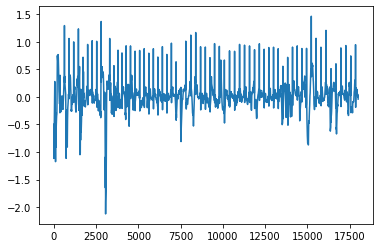

In [17]:
plt.plot(batch_with_data['A04211'].signal[0])
plt.show()

In [32]:
import random

Augmented = 0
dataset = np.zeros((15000, 9001))
pointer = 0
for ecg in batch_with_data:
  
  if ecg.target == 'A' or ecg.target == 'O' or ecg.target == 'N' or ecg.target == '~' : 
    if ecg.signal.shape[1] == 18000:
        
        dataset[pointer:pointer+1, :9000] = ecg.signal[:1, :9000]

        ### pointer+2 for next slice ###

        if ecg.target == 'A':
          dataset[pointer:pointer+2, 9000:9001] = 0
        elif ecg.target == 'N':
          dataset[pointer:pointer+2, 9000:9001] = 1
        elif ecg.target == 'O':
          dataset[pointer:pointer+2, 9000:9001] = 2
        elif ecg.target == '~':
          dataset[pointer:pointer+2, 9000:9001] = 3
        
        pointer += 1 
          
        ###### next slice ######

        
        dataset[pointer:pointer+1, :9000] = ecg.signal[:1, 9000:18000]
        pointer += 1 
        
        ## target column is already filled ##

    elif ecg.signal.shape[1] == 9000:
        
        dataset[pointer:pointer+1, :9000] = ecg.signal[:1, :9000]


        if ecg.target == 'A':
          dataset[pointer:pointer+1, 9000:9001] = 0
        elif ecg.target == 'N':
          dataset[pointer:pointer+1, 9000:9001] = 1
        elif ecg.target == 'O':
          dataset[pointer:pointer+1, 9000:9001] = 2
        elif ecg.target == '~':
          dataset[pointer:pointer+2, 9000:9001] = 3
        
        pointer += 1

    elif ecg.signal.shape[1] > 9000 and ecg.signal.shape[1] != 18000:
      
      
      dataset[pointer:pointer+1, :9000] = ecg.signal[:1, :9000]
      

      if ecg.target == 'A':
        dataset[pointer:pointer+1, 9000:9001] = 0
      elif ecg.target == 'N':
        dataset[pointer:pointer+1, 9000:9001] = 1
      elif ecg.target == 'O':
        dataset[pointer:pointer+1, 9000:9001] = 2
      elif ecg.target == '~':
        dataset[pointer:pointer+2, 9000:9001] = 3
        
        pointer += 1

    #### data augmentation ######


    if ecg.signal.shape[1] >= 9000:
      chance = 0.5
      rand_num = random.uniform(0, 1)
        
      if chance > rand_num :

          
        noise = np.random.normal(0,0.05,9000)
        new_signal = ecg.signal[:1, :9000] + noise  
        dataset[pointer:pointer+1, :9000] = new_signal



        if ecg.target == 'A':
          dataset[pointer:pointer+1, 9000:9001] = 0
        elif ecg.target == 'N':
          dataset[pointer:pointer+1, 9000:9001] = 1
        elif ecg.target == 'O':
          dataset[pointer:pointer+1, 9000:9001] = 2
        elif ecg.target == '~':
          dataset[pointer:pointer+2, 9000:9001] = 3
        
        pointer += 1
        Augmented += 1

    ################################

    else: 
      pass

  else:
    pass



print(Augmented)

3768


In [33]:
filled = 7608+Augmented
dataset[filled:15000, :]

array([[-0.12516804, -0.30078802, -0.32800749, ..., -0.03596403,
         0.05123833,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [0]:

trainset = np.zeros((filled, 9001))
trainset = dataset[:filled, :]

# some of the signals are skipped because of different dimentions

[[0.249 0.319 0.379 ... 0.091 0.092 0.093]]
[[1.]]


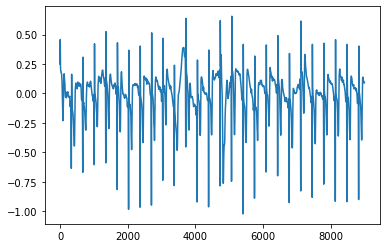

In [35]:
import matplotlib.pyplot as plt

# signal in trainset 
x = trainset[7000:7001, :-1]
target = trainset[7000:7001, -1:] 
plt.plot(x[0])
plt.show
print(x)
print(target)

In [0]:
temp = trainset[:, :]
temp = np.take(temp,np.random.permutation(temp.shape[0]),axis=0,out=temp);
X = temp[:, :-1]
Y = temp[:, -1:].reshape(filled, 1)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)


In [0]:
########  teeeeest ########## 
for index,row in enumerate(X_train):

  if row[0] == -0.497:
    print(row)
    print(y_train[index])


#############################

[-0.497 -0.633 -0.775 ... -0.016 -0.014 -0.011]
2.0


In [38]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (10238, 9000)
y_train (10238, 1)
X_test (1138, 9000)
y_test (1138, 1)


In [0]:
X_train = np.array(X_train.reshape(X_train.shape[0], 9000, 1))
X_test = np.array(X_test.reshape(X_test.shape[0], 9000, 1))
y_train = np.array(y_train)
y_test = np.array(y_test)

In [41]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (10238, 9000, 1)
y_train (10238, 1)
X_test (1138, 9000, 1)
y_test (1138, 1)


In [42]:
from keras.utils.np_utils import to_categorical


y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

Using TensorFlow backend.


In [43]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (10238, 9000, 1)
y_train (10238, 4)
X_test (1138, 9000, 1)
y_test (1138, 4)


In [0]:
# from scipy.sparse import csr_matrix
# y_train = csr_matrix.toarray(y_train)
# y_test = csr_matrix.toarray(y_test)

In [63]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model


# load model
model = load_model('/content/drive/My Drive/Cardio/HeartBeat.h5')

# summarize model.
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 2999, 64)     384         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 2999, 64)     36928       conv1d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 2999, 64)     256         conv1d_1[0][0]                   
______________________________________________________________________________________________

In [0]:
from tensorflow.keras.layers import (Input, Conv1D, BatchNormalization, Activation, Add, MaxPooling1D,
                                     Flatten, Dense, Softmax, LeakyReLU, Dropout)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


In [74]:
X_input = model.layers[-8].output


### step 1 

Conv1_1 = Conv1D(filters=256, kernel_size=9, strides=1, padding='same', name='conv1_1')(X_input)
Bn1_1 = BatchNormalization(name='Bn1_1')(Conv1_1)
Act1_1 = LeakyReLU(name='leaky_re_lu00')(Bn1_1)
Conv1_2 = Conv1D(filters=256, kernel_size=7, strides=1, padding='same', name='conv1_2')(Act1_1)
Bn1_2 = BatchNormalization(name='Bn1_2')(Conv1_2)
Act1_2 = LeakyReLU(name='leaky_re_lu01')(Bn1_2)
DO1_1 = Dropout(0.2)(Act1_2)
Conv1_3 = Conv1D(filters=512, kernel_size=9, strides=1, padding='same', name='conv1_3')(DO1_1)
Bn1_3 = BatchNormalization(name='Bn1_3')(Conv1_3)
shortcut1_1 = Add(name='Add0')([Bn1_3, X_input])
Bn1_4 = BatchNormalization(name='Bn1_4')(shortcut1_1)
Act1_3 = LeakyReLU(name='leaky_re_lu02')(Bn1_4)
##### auxiliary
Conv1_4 = Conv1D(filters=1024, kernel_size=7, strides=2, padding='same', name='conv1_4')(Act1_3)
Bn1_5 = BatchNormalization(name='Bn1_5')(Conv1_4)
Act1_4 = LeakyReLU(name='leaky_re_lu03')(Bn1_5)
###############
Max1_1 = MaxPooling1D(pool_size=5, strides=1)(Act1_4)




Flat1 = Flatten()(Max1_1)


# , kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)
D0 = Dense(1024)(Flat1)
Bn2 = BatchNormalization(name= 'batchNorm0')(D0)
Act2 = LeakyReLU(name='leaky_re_lu1')(Bn2)
Drop0 = Dropout(0.2)(Act2)
######

D1 = Dense(256)(Drop0)
# AP1 = GlobalAveragePooling2D()(D1)
Bn3 = BatchNormalization(name= 'batchNorm1')(D1)
Act3 = LeakyReLU(name='leaky_re_lu2')(Bn3)


#####

D2 = Dense(64)(Act3)
# AP1 = GlobalAveragePooling2D()(D1)
Bn4 = BatchNormalization(name= 'batchNorm2')(D2)
Act4 = LeakyReLU(name='leaky_re_lu3')(Bn4)

#####
D3 = Dense(4)(Act4)
Act5 = Softmax()(D3)

new_model = Model(inputs=model.inputs, outputs=Act5)
new_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 2999, 64)     384         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 2999, 64)     36928       conv1d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 2999, 64)     256         conv1d_1[0][0]                   
____________________________________________________________________________________________

In [75]:
new_model.get_layer('conv1d').trainable = False
new_model.get_layer('conv1d_1').trainable = False
new_model.get_layer('batch_normalization').trainable = False
new_model.get_layer('conv1d_2').trainable = False
new_model.get_layer('batch_normalization_1').trainable = False
new_model.get_layer('conv1d_3').trainable = False
new_model.get_layer('batch_normalization_2').trainable = False
new_model.get_layer('batch_normalization_3').trainable = False
new_model.get_layer('conv1d_4').trainable = False
new_model.get_layer('batch_normalization_4').trainable = False
new_model.get_layer('conv1d_5').trainable = False
new_model.get_layer('batch_normalization_5').trainable = False
new_model.get_layer('conv1d_6').trainable = False
new_model.get_layer('batch_normalization_6').trainable = False
new_model.get_layer('conv1d_7').trainable = False
new_model.get_layer('batch_normalization_7').trainable = False
new_model.get_layer('batch_normalization_8').trainable = False
new_model.get_layer('conv1d_8').trainable = False
new_model.get_layer('batch_normalization_9').trainable = False
new_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 2999, 64)     384         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 2999, 64)     36928       conv1d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 2999, 64)     256         conv1d_1[0][0]                   
____________________________________________________________________________________________

In [0]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=400,
    decay_rate=0.5)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [0]:
# compile model
new_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Early Stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

# Fit the model
history = new_model.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test), callbacks=[es_callback])

Epoch 1/25
80/80 [==============================] - 921s 12s/step - loss: 1.0454 - accuracy: 0.5967 - val_loss: 0.8986 - val_accuracy: 0.6643
Epoch 2/25
80/80 [==============================] - 925s 12s/step - loss: 0.7619 - accuracy: 0.6847 - val_loss: 0.7844 - val_accuracy: 0.6643
Epoch 3/25
80/80 [==============================] - 935s 12s/step - loss: 0.6436 - accuracy: 0.7346 - val_loss: 0.9776 - val_accuracy: 0.5923
Epoch 4/25
80/80 [==============================] - 933s 12s/step - loss: 0.5654 - accuracy: 0.7721 - val_loss: 0.5839 - val_accuracy: 0.7601
Epoch 5/25
80/80 [==============================] - 925s 12s/step - loss: 0.5285 - accuracy: 0.7878 - val_loss: 0.5627 - val_accuracy: 0.7733
Epoch 6/25
80/80 [==============================] - 928s 12s/step - loss: 0.4975 - accuracy: 0.8045 - val_loss: 0.5050 - val_accuracy: 0.7961
Epoch 7/25
80/80 [==============================] - 933s 12s/step - loss: 0.4610 - accuracy: 0.8182 - val_loss: 0.4712 - val_accuracy: 0.8163
Epoch 

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# save model and architecture to single file
model.save('/content/drive/My Drive/Cardio/AF_Classification.h5')
print("Saved model to disk")

accuracy: 79.56%
Saved model to disk
